# Feature Selection

### DO not run

Features Count: 10, Time Taken: 0.4727134704589844, Sample Size: 1000, Feature Size: 100
Features Count: 11, Time Taken: 0.5499444007873535, Sample Size: 1000, Feature Size: 100
Features Count: 12, Time Taken: 0.6427302360534668, Sample Size: 1000, Feature Size: 100
Features Count: 13, Time Taken: 0.739145040512085, Sample Size: 1000, Feature Size: 100
Features Count: 14, Time Taken: 0.8765039443969727, Sample Size: 1000, Feature Size: 100
Features Count: 15, Time Taken: 0.9761753082275391, Sample Size: 1000, Feature Size: 100
Features Count: 16, Time Taken: 1.0809528827667236, Sample Size: 1000, Feature Size: 100
Features Count: 17, Time Taken: 1.222367763519287, Sample Size: 1000, Feature Size: 100
Features Count: 18, Time Taken: 1.329857349395752, Sample Size: 1000, Feature Size: 100
Features Count: 19, Time Taken: 1.4787063598632812, Sample Size: 1000, Feature Size: 100
Features Count: 20, Time Taken: 1.6409060955047607, Sample Size: 1000, Feature Size: 100
Features Count: 21, Time

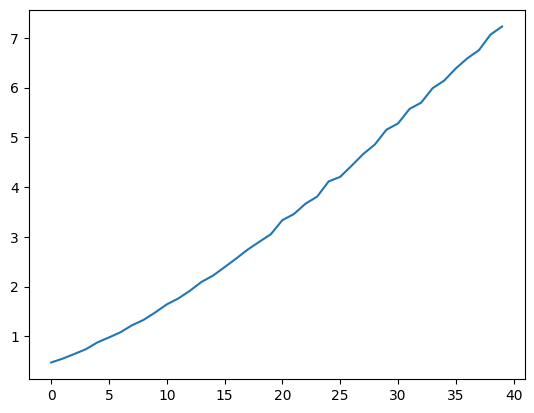

In [1]:
import time 

# generate data using sklearn 

from sklearn.datasets import make_classification
import pandas as pd
import pymrmr 

n_samples = 1000
n_features = 100
n_informative = int(n_features * 0.15)
n_redundant = int(n_features * 0.5)
n_repeated = int(n_features * 0.1)
mrmr_features = 10 

X, y = make_classification(n_samples=n_samples, 
                           n_features=n_features, 
                           n_informative=n_informative, 
                           n_redundant=n_redundant, 
                           n_repeated=n_repeated, 
                           n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

df = pd.DataFrame(X)
# convert all the columns of X into string type
df.columns = df.columns.astype(str)

def measure_time(X, mrmr_features):
    start_time = time.time()
    mrmr_features = pymrmr.mRMR(df, 'MIQ', mrmr_features)
    end_time = time.time()
    return end_time - start_time

# print the time taken to select the top 100 features using MRMR

# print(f'Time taken to select the top {mrmr_features} features using MRMR: ', measure_time(X, mrmr_features))

time_taken = []

i = 10 
max_sel = int(n_features/2) if int(n_features/2) else 100
while i < max_sel:
    t = measure_time(X, i)
    time_taken.append(t)
    print(f'Features Count: {i}, Time Taken: {t}, Sample Size: {n_samples}, Feature Size: {n_features}')
    i += 1 

import matplotlib.pyplot as plt 

plt.plot(time_taken)


In [6]:
# create a VarianceThreshold object

varSel = VarianceThreshold(threshold=0)

# fit the VarianceThreshold object to the feature data

varSel.fit(features_np)

# print the number of features that have a variance greater than 0

print('Number of features with a variance greater than 0: ', varSel.get_support().sum())

# print the names of the features that have a variance greater than 0

print('Features with a variance greater than 0: ', col_index[varSel.get_support()])

Number of features with a variance greater than 0:  18992
Features with a variance greater than 0:  Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'H3C2', 'H3C3', 'AC098582.1', 'DUS4L-BCAP29', 'C8orf44-SGK3', 'ELOA3B',
       'NPBWR1', 'ELOA3D', 'ELOA3', 'CDR1'],
      dtype='object', length=18992)


In [7]:
# Use MRMR and RFE to select features for the ribociclib dataset 

In [6]:
import pymrmr 
# generate data using sklearn 

from sklearn.datasets import make_classification
import pandas as pd

# generate a random dataset

X, y = make_classification(n_samples=1000, n_features=1000, n_informative=150, n_redundant=500, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

# print the shape of the feature data

print(X.shape, y.shape)

# convert X into pandas dataframe

df = pd.DataFrame(X)

# convert all the columns of X into string type

df.columns = df.columns.astype(str)
mrmr_fn = 100 

# use MRMR to select the top 100 features

mrmr_features = pymrmr.mRMR(df, 'MIQ', mrmr_fn)

# print the selected features

print(mrmr_features)

In [12]:
import time 

# generate data using sklearn 

from sklearn.datasets import make_classification
import pandas as pd
import pymrmr 


def measure_time(mrmr_features, n_features):
    n_samples = 1000
    n_informative = int(n_features * 0.15)
    n_redundant = int(n_features * 0.5)
    n_repeated = int(n_features * 0.1)
    mrmr_features = 10 

    X, y = make_classification(n_samples=n_samples, 
                            n_features=n_features, 
                            n_informative=n_informative, 
                            n_redundant=n_redundant, 
                            n_repeated=n_repeated, 
                            n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    df = pd.DataFrame(X)
    # convert all the columns of X into string type
    df.columns = df.columns.astype(str)
    start_time = time.time()
    mrmr_features = pymrmr.mRMR(df, 'MIQ', mrmr_features)
    end_time = time.time()
    return end_time - start_time

# print the time taken to select the top 100 features using MRMR

# print(f'Time taken to select the top {mrmr_features} features using MRMR: ', measure_time(X, mrmr_features))

time_taken = []

i = 20
max_sel = 2000
while i < max_sel:
    t = measure_time(10, i)
    time_taken.append(t)
    print(f'Features Count: 10, Time Taken: {t}, Feature Size: {i}')
    i = i * 2




Features Count: 10, Time Taken: 0.0469965934753418, Feature Size: 20
Features Count: 10, Time Taken: 0.14049172401428223, Feature Size: 40
Features Count: 10, Time Taken: 0.36102771759033203, Feature Size: 80
Features Count: 10, Time Taken: 0.8814668655395508, Feature Size: 160
Features Count: 10, Time Taken: 2.2891926765441895, Feature Size: 320
Features Count: 10, Time Taken: 7.556275129318237, Feature Size: 640
Features Count: 10, Time Taken: 60.10821747779846, Feature Size: 1280


In [8]:
# Use MRMR to select the top 10 features

mrmr_feature_number = 10

mrmr_features = pymrmr.mRMR(feature_data, 'MIQ', mrmr_feature_number)

# print the names of the features selected by MRMR

print('Features selected by MRMR: ', mrmr_features)

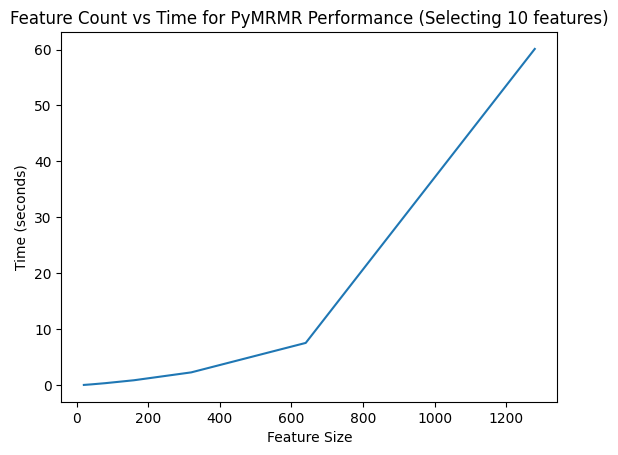

In [14]:
import matplotlib.pyplot as plt 

plt.title('Feature Count vs Time for PyMRMR Performance (Selecting 10 features)')
plt.xlabel('Feature Size')
plt.ylabel('Time (seconds)')
plt.plot([20,40,80,160,320,640,1280], time_taken)


In [24]:
# using both MRMR and RFE to select features 

import pymrmr 
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVR

# Use MRMR to select the top 100 features

mrmr_feature_number = 100

mrmr_features = pymrmr.mRMR(feature_data, 'MIQ', mrmr_feature_number)

mrmr_selected_feature_data = feature_data[mrmr_features]

print(mrmr_selected_feature_data.shape)

# Use RFE to select the top 10 features from MRMR features

rfe_feature_number = 10

rfe_estimator = LinearSVR()

rfe_selector = RFECV(rfe_estimator, n_features_to_select=rfe_feature_number, step=1, verbose=1, cv=5)

rfe_selector = rfe_selector.fit(mrmr_selected_feature_data, labels_np)

# print the names of the features selected by RFE

print('Features selected by RFE: ', feature_data[rfe_selector.support_])

# refine the feature data using the features selected by MRMR and RFE

rfe_features = feature_data[rfe_selector.support_]

In [10]:
# refine the feature data using the features selected by MRMR and RFE

rfe_features = col_index[rfe_selector.support_]

# print(rfe_features)

# print(feature_data.shape)

selected_feature_data = feature_data[rfe_features]

In [19]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVR

# import svm


# Use RFE to select the top 10 features

rfe_feature_number = 100

rfe_estimator = LinearSVR()
rfe_estimator.fit(features_np, labels_np)

rfe_selector = RFE(rfe_estimator, n_features_to_select=rfe_feature_number, step=1, verbose=1)

rfe_selector = rfe_selector.fit(features_np, labels_np)

# print the names of the features selected by RFE

print('Features selected by RFE: ', col_index[rfe_selector.support_])


Fitting estimator with 19221 features.
Fitting estimator with 19220 features.
Fitting estimator with 19219 features.
Fitting estimator with 19218 features.
Fitting estimator with 19217 features.
Fitting estimator with 19216 features.
Fitting estimator with 19215 features.
Fitting estimator with 19214 features.
Fitting estimator with 19213 features.
Fitting estimator with 19212 features.
Fitting estimator with 19211 features.
Fitting estimator with 19210 features.


KeyboardInterrupt: 

## Playground

In [1]:
from sklearn.feature_selection import VarianceThreshold
import pickle

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/ribociclib_data.pkl', 'rb') as f:
    ribociclib_data = pickle.load(f)

In [2]:
print(ribociclib_data.head())

                  LN_IC50    CELLLINE    TSPAN6      TNMD      DPM1     SCYL3  \
SANGER_MODEL_ID                                                                 
SIDM00872        4.254618  ACH-000859  5.296090  0.000000  6.794416  3.452859   
SIDM00866        3.583018  ACH-000374  5.214125  0.000000  6.328047  3.168321   
SIDM00885        4.023289  ACH-000111  5.241840  0.201634  5.615299  3.090853   
SIDM00884        3.146215  ACH-000699  3.481557  0.000000  7.070389  2.341986   
SIDM00877        6.135124  ACH-000196  4.349082  0.000000  6.479942  2.790772   

                 C1orf112       FGR       CFH     FUCA2  ...      H3C2  \
SANGER_MODEL_ID                                          ...             
SIDM00872        5.260778  0.042644  4.339137  5.833143  ...  1.827819   
SIDM00866        4.654206  0.042644  0.432959  6.574102  ...  0.000000   
SIDM00885        3.732269  0.084064  0.111031  4.026800  ...  0.632268   
SIDM00884        3.679199  0.176323  3.420887  5.854494  ...  

In [3]:
# extract the feature data from the joined dataset

feature_data = ribociclib_data.drop(columns=['LN_IC50'])
feature_data.drop(columns=['CELLLINE'], inplace=True)

# extract the label data from the joined dataset

label_data = ribociclib_data['LN_IC50']

In [4]:
# extract feature data index and column names

row_index = feature_data.index

print(row_index[0])

col_index = feature_data.columns

print(col_index[0])

SIDM00872
TSPAN6


In [29]:
# find out the mean and std of label data

print(label_data.mean())

print(label_data.std())

4.157641840909092
1.0169617839067444


In [5]:
# convert feature data and label data to numpy array

features_np = feature_data.to_numpy()
labels_np = label_data.to_numpy()

In [6]:
# A quick prediction using the all features

# get prediction accuracy for the ribociclib dataset using the selected features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.2, random_state=42)

# create a LinearSVR object

svr = LinearRegression()

# fit the LinearSVR object to the training data

svr.fit(X_train, y_train)

# print the prediction accuracy for the training data via MSE 

from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_train, svr.predict(X_train))

print('Linear Regression')
print(score)

# print the prediction accuracy for the testing data via MSE

score_test = mean_squared_error(y_test, svr.predict(X_test))

print(score_test)

# use linearsvr

# create a LinearSVR object

svr = LinearSVR()

# fit the LinearSVR object to the training data

svr.fit(X_train, y_train)

# print the prediction accuracy for the training data via MSE

score = mean_squared_error(y_train, svr.predict(X_train))

print('Linear SVR')

print(score)

# print the prediction accuracy for the testing data via MSE

score_test = mean_squared_error(y_test, svr.predict(X_test))

print(score_test)


Linear Regression
4.451429393747138e-30
2.0311474200761888
Linear SVR
1.4889217354759448e-08
2.1188357274897585


Implementing GFFS (Greedy Forward Feature Selection) - A re-implementation in Python

In [7]:
# First apply filter based strategy, Shin et al 2023 used ANOVA based strategy for categorical label variables. 
# Here we are interested in numerical label variables, therefore we use Pearson's correlation coefficient 
# via f_regression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=100)
# apply feature selection
pearson_fs_feature = fs.fit_transform(feature_data, label_data)
print(pearson_fs_feature.shape)

scores, pval = fs.scores_, fs.pvalues_
support = fs.get_support(indices=True)

selected_scores, selected_pval = scores[support], pval[support]

# rank selected features by highest score

ranked_features = sorted(zip(selected_scores, selected_pval, support), reverse=True)

# selected features 

selected_feature_data = feature_data.iloc[:, support]

print(ranked_features)

(44, 100)
[(24.05328882360086, 1.4510926691883484e-05, 3720), (23.207173495967876, 1.921849929605232e-05, 8182), (22.020571410849886, 2.869524981265973e-05, 6183), (19.75970754702939, 6.304283091607342e-05, 1368), (17.192091044386316, 0.00016045758767997334, 16792), (16.919628286532426, 0.00017766118823806648, 13848), (15.928446630034077, 0.00025854174736616764, 59), (15.160676990890257, 0.0003475399450918896, 18564), (15.142134563075588, 0.00035005210610856855, 11230), (14.981899368910724, 0.00037257480577790515, 11563), (14.844940365354287, 0.00039303603350314745, 11092), (14.812841521347588, 0.00039800065306130834, 14748), (14.72834766256964, 0.00041138756011616535, 10752), (14.11271045584335, 0.0005244629661054672, 11308), (13.759096305091722, 0.0006038443858196774, 10604), (13.71697481533636, 0.0006141120521452955, 307), (13.58738927135404, 0.0006468710443885048, 12543), (13.402769352547756, 0.00069676198407257, 16881), (13.243065909941743, 0.0007431952038174733, 10627), (13.16292

In [8]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# test training with selected features using f_regression

score = cross_val_score(LinearSVR(), selected_feature_data, label_data, cv=5, scoring='neg_mean_squared_error')

print(score)
print(score.mean())

[-0.53971326 -1.40648788 -0.47004955 -1.07140763 -2.22445163]
-1.1424219899216896


c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
# perform greedy forward feature selection (GFFS) using the importance score (IS) of the features
# here, the importance score is the f-statistic of the feature

from sklearn.svm import LinearSVR
# from sklearn.feature_selection import SequentialFeatureSelector # SFS lacks verbosity and step-by-step outputs

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# disable warnings
import warnings
warnings.filterwarnings("ignore")

# ------------ Input
# K: number of features to be selected
# X: feature data
# y: label data
# model: model to be used for feature selection
# verbose[Int] = 0: reporting information for each iteration
# ------------ Output
# feature_selected[List[Int]]: list of selected features index format 
# successive_scores[List[Float]]: list of successive scores

feature_selected = []
feature_selected.append(ranked_features[0][2])
# print(feature_selected)

selected_feature_data_gffs = feature_data.iloc[:,feature_selected]
model = LinearSVR()
score = cross_val_score(model, selected_feature_data_gffs, label_data, cv=5, scoring='neg_mean_squared_error').mean()
max_num_features = 20 
successive_scores = []
successive_scores.append(score)

while len(feature_selected) < max_num_features:
    max_score = -10000
    max_feature = 0
    for i in range(len(ranked_features)):
        if ranked_features[i][2] not in feature_selected:
            feature_selected.append(ranked_features[i][2])
            selected_feature_data_gffs = feature_data.iloc[:,feature_selected]

            # cross validation 5 times and get average score

            score = cross_val_score(model, selected_feature_data_gffs, label_data, cv=5, scoring='neg_mean_squared_error').mean()

            # model.fit(selected_feature_data_gffs, label_data)
            # score = mean_squared_error(label_data, model.predict(selected_feature_data_gffs))
            if score > max_score:
                max_score = score
                max_feature = ranked_features[i][2]
            feature_selected.pop()
    feature_selected.append(max_feature)
    successive_scores.append(max_score)
    print(f'Feature Selected: {max_feature}, Score: {max_score}, Feature Size: {len(feature_selected)}')


Feature Selected: 18955, Score: -0.5116638355391141, Feature Size: 2
Feature Selected: 8850, Score: -0.37283977220036235, Feature Size: 3
Feature Selected: 17831, Score: -0.35412940153984135, Feature Size: 4
Feature Selected: 1368, Score: -0.3228751114378957, Feature Size: 5
Feature Selected: 12541, Score: -0.27993413251222027, Feature Size: 6
Feature Selected: 15484, Score: -0.23809721085334606, Feature Size: 7
Feature Selected: 4275, Score: -0.21807896665755813, Feature Size: 8
Feature Selected: 492, Score: -0.18794161160994866, Feature Size: 9
Feature Selected: 9171, Score: -0.17051618258785892, Feature Size: 10
Feature Selected: 15615, Score: -0.16966435496630436, Feature Size: 11
Feature Selected: 12610, Score: -0.16707269633349023, Feature Size: 12
Feature Selected: 15758, Score: -0.165065087638465, Feature Size: 13
Feature Selected: 11308, Score: -0.1650663811654739, Feature Size: 14
Feature Selected: 1118, Score: -0.1661855453785585, Feature Size: 15
Feature Selected: 10439, Sc

In [10]:
# test the selected features with a final go through of cross validation

selected_feature_data_gffs = feature_data.iloc[:,feature_selected]

score = cross_val_score(model, selected_feature_data_gffs, label_data, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Final Score: {score}')

Final Score: -0.1742291807709548


In [11]:
# select feature names using col_index 

gffs_feature_names = feature_data.columns[feature_selected]

print(gffs_feature_names, feature_selected)
# print(col_index[3720]) # verify the feature name at index 3720

# make successive_scores positive

pos_successive_scores = [abs(x) for x in successive_scores]

Index(['FOLR3', 'TBC1D3I', 'GOLGA7', 'C1GALT1C1L', 'PAK3', 'B3GNT2', 'RGS7BP',
       'HEMK1', 'ALG1', 'SPATA4', 'VSTM2B', 'SLC26A5', 'CLEC17A', 'PRKACG',
       'CHAT', 'HCRT', 'IDI2', 'MTRNR2L10', 'FGF23', 'FOXB1'],
      dtype='object') [3720, 18955, 8850, 17831, 1368, 12541, 15484, 4275, 492, 9171, 15615, 12610, 15758, 11308, 1118, 10439, 8949, 18564, 4817, 12917]


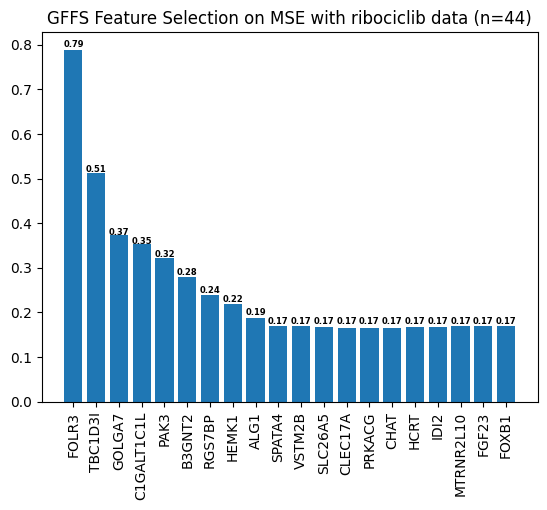

In [12]:
# create bar chart for the successive scores associated with gffs feature names 

import matplotlib.pyplot as plt

plt.bar(gffs_feature_names, pos_successive_scores)
plt.title('GFFS Feature Selection on MSE with ribociclib data (n=44)')
plt.xticks(rotation=90)

# show each bar value

for i, v in enumerate(pos_successive_scores):
    # change v to 2 decimal places
    v = round(v, 2)
    plt.text(i, v, str(v), color='black', fontweight='bold', fontsize=6, ha='center', va='bottom', rotation=0)

plt.show()


Implementing the MRMR (Minimum Redundancy Maximum Relevance) Algorithm 

MRMR does not conflict with the GFFS algorithm. It can even possibly complement GFFS by providing a more objective way of selecting features as a filtering step before GFFS.

In [13]:
# Code adapted from: 
# https://towardsdatascience.com/mrmr-explained-exactly-how-you-wished-someone-explained-to-you-9cf4ed27458b

import pandas as pd
from sklearn.feature_selection import f_regression


def mrmr(X, y, K, verbose=0):

    # inputs:
    #    X: pandas.DataFrame, features
    #    y: pandas.Series, target variable
    #    K: number of features to select

    # compute F-statistics and initialize correlation matrix
    F = pd.Series(f_regression(X, y)[0], index = X.columns)
    corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

    # initialize list of selected features and list of excluded features
    selected = []
    successive_scores = []
    not_selected = X.columns.to_list()

    # repeat K times
    for i in range(K):
    
        # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
        if i > 0:
            last_selected = selected[-1]
            corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)
            
        # compute FCQ score for all the (currently) excluded features (this is Formula 2)
        score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
        
        # find best feature, add it to selected and remove it from not_selected
        best = score.index[score.argmax()]
        selected.append(best)
        not_selected.remove(best)
        successive_scores.append(score.max())

        if verbose == 1: 
            print('Iteration', i+1, 'selected', best, 'score', score.max(), 'remaining', len(not_selected), 'features')
    
    return selected, successive_scores

In [22]:
import warnings

warnings.filterwarnings("ignore")

mrmr_selected_features, mrmr_scores = mrmr(feature_data, label_data, 20, verbose=1)

print(mrmr_selected_features)

mrmr_selected_features_index = [feature_data.columns.get_loc(c) for c in mrmr_selected_features]

print(mrmr_selected_features_index)

Iteration 1 selected FOLR3 score 2405328.882360086 remaining 19220 features
Iteration 2 selected KIAA1841 score 56175.64972741656 remaining 19219 features
Iteration 3 selected COX6A2 score 929.9799119433212 remaining 19218 features
Iteration 4 selected PGA5 score 243.06331156021403 remaining 19217 features
Iteration 5 selected L3MBTL2 score 245.8932639037736 remaining 19216 features
Iteration 6 selected PAK3 score 150.1157165100612 remaining 19215 features
Iteration 7 selected OR2T33 score 101.4555849361786 remaining 19214 features
Iteration 8 selected SYPL2 score 85.52732482067111 remaining 19213 features
Iteration 9 selected CACNG6 score 73.9764396367321 remaining 19212 features
Iteration 10 selected TBC1D3I score 74.62674289019189 remaining 19211 features
Iteration 11 selected SLC8A1 score 63.80905537603905 remaining 19210 features
Iteration 12 selected UVRAG score 63.31609411855542 remaining 19209 features
Iteration 13 selected PDK4 score 62.796959241539774 remaining 19208 features

In [23]:
from sklearn.svm import LinearSVR
# from sklearn.feature_selection import SequentialFeatureSelector # SFS lacks verbosity and step-by-step outputs

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings("ignore")

selected_feature_data_mrmr = feature_data.iloc[:,mrmr_selected_features_index]
model = LinearSVR()
score = cross_val_score(model, selected_feature_data_mrmr, label_data, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Final Score: {-score}')

Final Score: 0.41822749504293044


In [25]:
# select K from 1 to 100 and plot cross validation scores for each 

import warnings

warnings.filterwarnings("ignore")
mrmr_selected_features, mrmr_scores = mrmr(feature_data, label_data, 100, verbose=1)
print(mrmr_selected_features)
mrmr_selected_features_index = [feature_data.columns.get_loc(c) for c in mrmr_selected_features]
print(mrmr_selected_features_index)

Iteration 1 selected FOLR3 score 2405328.882360086 remaining 19220 features
Iteration 2 selected KIAA1841 score 56175.64972741656 remaining 19219 features
Iteration 3 selected COX6A2 score 929.9799119433212 remaining 19218 features
Iteration 4 selected PGA5 score 243.06331156021403 remaining 19217 features
Iteration 5 selected L3MBTL2 score 245.8932639037736 remaining 19216 features
Iteration 6 selected PAK3 score 150.1157165100612 remaining 19215 features
Iteration 7 selected OR2T33 score 101.4555849361786 remaining 19214 features
Iteration 8 selected SYPL2 score 85.52732482067111 remaining 19213 features
Iteration 9 selected CACNG6 score 73.9764396367321 remaining 19212 features
Iteration 10 selected TBC1D3I score 74.62674289019189 remaining 19211 features
Iteration 11 selected SLC8A1 score 63.80905537603905 remaining 19210 features
Iteration 12 selected UVRAG score 63.31609411855542 remaining 19209 features
Iteration 13 selected PDK4 score 62.796959241539774 remaining 19208 features

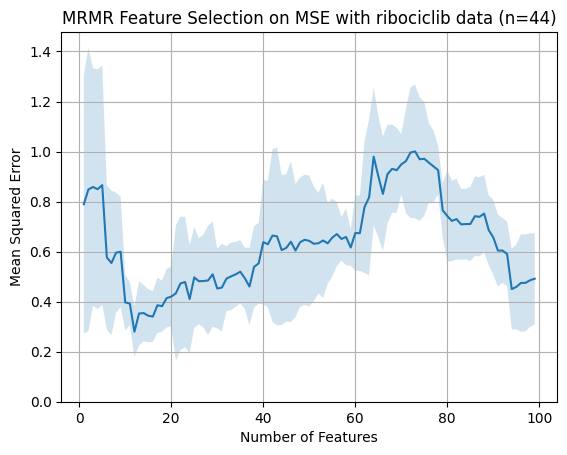

In [28]:
import matplotlib.pyplot as plt

K = range(1,100,1)
total_scores = []
total_std = []
model = LinearSVR()

for k in K:
    # print(f'K = {k}')
    selected_feature_data_mrmr = feature_data.iloc[:,mrmr_selected_features_index[:k]]
    score = cross_val_score(model, selected_feature_data_mrmr, label_data, cv=5, scoring='neg_mean_squared_error')
    total_scores.append(-score.mean())
    total_std.append(score.std())

# plot with error bars

plt.plot(K, total_scores)
plt.fill_between(K, [x - y for x, y in zip(total_scores, total_std)], [x + y for x, y in zip(total_scores, total_std)], alpha=0.2)
plt.title('MRMR Feature Selection on MSE with ribociclib data (n=44)')
plt.xlabel('Number of Features')
# y axis begin at 0
plt.ylim(bottom=0)
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

### Nested Cross-validation for when wrapper methods are used 

In the case of using cross-validation within wrapper methods, the inner loop is used to select the best model (given a set of features) and the outer loop is used to estimate the generalization error of the selected model.

Papers which support the use of nested cross-validation: 



## Streamline

Streamlined code needs to be a set of functions, with proper imports and documentation. Each code block must be independent of the others.

- Step 1. Filter-based feature selection toolkit 
- Step 2. Wrapper-based feature selection toolkit 
- Step 3. Visualisation

In [6]:
# extract GDSC2 data into feature and labels
import pandas as pd

def create_feature_and_label(df: pd.DataFrame, label_name: str = 'LN_IC50'):
    # extract the feature data from the joined dataset

    feature_data = df.drop(columns=[label_name])
    feature_data.drop(columns=['CELLLINE'], inplace=True)

    # extract the label data from the joined dataset

    label_data = df[label_name]

    return feature_data, label_data

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

def naive_test_regression(feature_data, label_data):

    # test the model with the naive feature selection
    print('------ Naive test - linear regression')
    score = cross_val_score(LinearRegression(), feature_data, label_data, cv=5, scoring='neg_mean_squared_error')
    print(f'linear regression, score: {-score.mean()}, std: {score.std()}')

    print('------ Naive test - linear SVR')
    score = cross_val_score(LinearSVR(), feature_data, label_data, cv=5, scoring='neg_mean_squared_error')
    print(f'linear SVR, score: {-score.mean()}, std: {score.std()}')

In [8]:
from sklearn.feature_selection import SelectKBest

def filter_feature_selection(feature_data, label_data, method, K, get_selected_data=False):
    # define feature selection
    fs = SelectKBest(score_func=method, k=K)
    # apply feature selection
    pearson_fs_feature = fs.fit_transform(feature_data, label_data)
    print(pearson_fs_feature.shape)

    scores, pval = fs.scores_, fs.pvalues_
    support = fs.get_support(indices=True)

    selected_scores, selected_pval = scores[support], pval[support]

    # rank selected features by highest score

    ranked_features = sorted(zip(selected_scores, support), reverse=True)

    # selected features 
    if get_selected_data:
        selected_feature_data = feature_data.iloc[:, support]
        return selected_feature_data, support
    
    # print(ranked_features)
    return selected_scores, support

In [9]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

def naive_test_classification(feature_data, label_data, models=None):

    if models is None:
        # default model set 
        models = [LogisticRegression()]

    # test the model with the naive feature selection
    score = cross_val_score(model, feature_data, label_data, cv=5, scoring='neg_mean_squared_error').mean()
    print(f'Naive Score: {-score}')

In [10]:
from sklearn.feature_selection import f_regression, mutual_info_regression

def mrmr_select_fcq(X, y, K, verbose=0, return_index=True):

    # ------------ Input
    # X: pandas.DataFrame, features
    # y: pandas.Series, target variable
    # K: number of features to select
    
    # ------------ Output
    # feature_selected[List[Int]]: list of selected features index format 
    # successive_scores[List[Float]]: list of successive scores

    # compute F-statistics and initialize correlation matrix
    F = pd.Series(f_regression(X, y)[0], index = X.columns)
    corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

    # initialize list of selected features and list of excluded features
    selected = []
    successive_scores = []
    not_selected = X.columns.to_list()

    # repeat K times
    for i in range(K):
    
        # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
        if i > 0:
            last_selected = selected[-1]
            corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)
            
        # compute FCQ score for all the (currently) excluded features
        score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
        
        # find best feature, add it to selected and remove it from not_selected
        best = score.index[score.argmax()]
        successive_scores.append(score.max())
        selected.append(best)
        not_selected.remove(best)

        if verbose == 1: 
            print('Iteration', i+1, 'selected', best, 'score', score.max(), 'remaining', len(not_selected), 'features')
    
    if return_index:
        return [X.columns.get_loc(c) for c in selected], successive_scores

    return selected, successive_scores

In [26]:
from sklearn.model_selection import cross_val_score

def greedy_forward_select(X, y, K, model, ranked_features, scoring_method, cv_num=5, verbose=0):
    # ------------ Input
    # K[Int]: number of features to be selected
    # X[pd.Dataframe]: feature data
    # y[pd.Series]: label data
    # model: model to be used for feature selection
    # ranked_features[List[Tuple]]: list of tuples of (feature score, feature index)
    # scoring_method[String]: scoring method for cross validation
    # verbose[Int] = 0: reporting information for each iteration


    # ------------ Output
    # feature_selected[List[Int]]: list of selected features index format 
    # successive_scores[List[Float]]: list of successive scores

    feature_selected = []
    # select the first feature
    feature_selected.append(ranked_features[0][1])

    selected_feature_data_gffs = X.iloc[:,feature_selected]
    score = cross_val_score(model, selected_feature_data_gffs, y, cv=cv_num, scoring=scoring_method).mean()
    successive_scores = []
    successive_scores.append(score)

    while len(feature_selected) < K:
        max_score = -10000
        max_feature = 0
        for i in range(len(ranked_features)):
            if ranked_features[i][1] not in feature_selected:
                feature_selected.append(ranked_features[i][1])
                selected_feature_data_gffs = X.iloc[:,feature_selected]

                # cross validation 5 times and get average score
                score = cross_val_score(model, selected_feature_data_gffs, y, cv=cv_num, scoring=scoring_method).mean()
                if score > max_score:
                    max_score = score
                    max_feature = ranked_features[i][1]
                feature_selected.pop()
        feature_selected.append(max_feature)
        successive_scores.append(max_score)
        if verbose == 1:
            print(f'Feature Selected: {max_feature}, Score: {max_score}, Feature Size: {len(feature_selected)}')

    return feature_selected, successive_scores

## Production

Uses streamlined code to produce the final outcomes. The final outcome can be an image, a report, a set of figures, an exportable model, a set of data files, a short script that is easy to use, GUI or finally, a complete software/package. This means that, production code in fact are unlikely to be still contained in a jupyter notebook.

In this case, feature-selection.ipynb is used to produce a list of selected features to act as predictive biomarkers, a final model and a set of supporting figures.

### Palbociclib

In [12]:
import pickle

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/palbociclib_data.pkl', 'rb') as f:
    palbociclib_data = pickle.load(f)

In [16]:
feature_data, label_data = create_feature_and_label(palbociclib_data)

print(label_data.mean(), label_data.std())

3.6774345119863017 1.5952913449402224


In [21]:
# naive test on all features

naive_test_regression(feature_data, label_data)

------ Naive test - linear regression
linear regression, score: 1.7582581535115611, std: 0.21158982038668867
------ Naive test - linear SVR
linear SVR, score: 1.7825290602489843, std: 0.2098584429712049


In [14]:
from sklearn.feature_selection import f_regression

ranked_features = filter_feature_selection(feature_data, label_data, f_regression, 100)

for x in ranked_features:
    print(x)


(584, 100)
(221.21132165451527, 12238)
(217.78554224170708, 7560)
(207.1460576593157, 356)
(207.00033344442434, 5398)
(204.70066422439191, 4206)
(192.04434925054503, 8252)
(191.30639475468982, 8356)
(191.06700962966102, 5310)
(190.61158013732046, 15325)
(190.20996045025623, 6226)
(190.1644769699162, 2240)
(183.90856269724765, 2846)
(175.736475833332, 1317)
(172.83615310045602, 14578)
(170.09846385912567, 8175)
(169.60955524373287, 3006)
(169.44686309101954, 825)
(168.7187729654294, 12248)
(167.56099081093726, 682)
(167.5200072091631, 8194)
(166.48680547436106, 10573)
(165.46723686531539, 130)
(164.69359402515414, 15601)
(163.50432188210627, 2831)
(161.0114338989097, 5309)
(160.2926985836165, 5180)
(160.0946860974605, 9902)
(159.7460809461203, 5316)
(159.05287363301449, 0)
(158.96157441499147, 8168)
(158.29368504472933, 7461)
(157.66283462793558, 1520)
(157.46748524463106, 13933)
(157.19705336248865, 13624)
(157.00752424613074, 12017)
(154.9563437684709, 16456)
(154.45112701097884, 1655

In [20]:
# separate ranked features into scores and indices

# disable warnings
import warnings
warnings.filterwarnings("ignore")

ranked_scores = [x[0] for x in ranked_features]
ranked_indices = [x[1] for x in ranked_features]

filter_selected_feature_data = feature_data.iloc[:, ranked_indices]

print(filter_selected_feature_data.shape)

naive_test_regression(filter_selected_feature_data, label_data)

(584, 100)
------ Naive test - linear regression
linear regression, score: 1.9276840104908544, std: 0.07776665504279263
------ Naive test - linear SVR
linear SVR, score: 2.739236364710183, std: 0.5132604309760966


In [22]:
mrmr_feature_selected, successive_scores = mrmr_select_fcq(feature_data, label_data, 100, verbose=1)

Iteration 1 selected PPIC score 22121132.165451527 remaining 19220 features
Iteration 2 selected CELA2A score 83980.20393559842 remaining 19219 features
Iteration 3 selected NWD1 score 4595.222986770851 remaining 19218 features
Iteration 4 selected GLI1 score 1195.3388663691114 remaining 19217 features
Iteration 5 selected SLC49A4 score 1023.787911536718 remaining 19216 features
Iteration 6 selected RPL3 score 700.2496622792282 remaining 19215 features
Iteration 7 selected AMOTL2 score 620.9156116941508 remaining 19214 features
Iteration 8 selected LAMA5 score 537.1574529477324 remaining 19213 features
Iteration 9 selected CARNMT1 score 505.52523237115287 remaining 19212 features
Iteration 10 selected SDC4 score 537.4862732811785 remaining 19211 features
Iteration 11 selected TUFT1 score 498.06030969716284 remaining 19210 features
Iteration 12 selected WAS score 473.376975851769 remaining 19209 features
Iteration 13 selected PXDC1 score 446.2845514086713 remaining 19208 features
Iterat

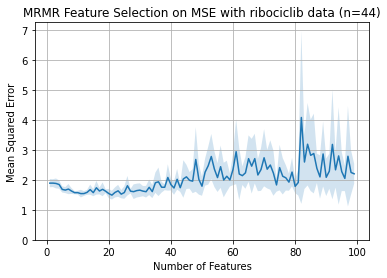

In [24]:
import matplotlib.pyplot as plt

K = range(1,100,1)
total_scores = []
total_std = []
model = LinearSVR()

for k in K:
    # print(f'K = {k}')
    selected_feature_data_mrmr = feature_data.iloc[:,mrmr_feature_selected[:k]]
    score = cross_val_score(model, selected_feature_data_mrmr, label_data, cv=5, scoring='neg_mean_squared_error')
    total_scores.append(-score.mean())
    total_std.append(score.std())

# plot with error bars

plt.plot(K, total_scores)
plt.fill_between(K, [x - y for x, y in zip(total_scores, total_std)], [x + y for x, y in zip(total_scores, total_std)], alpha=0.2)
plt.title('MRMR Feature Selection on MSE with palbociclib data (n=584)')
plt.xlabel('Number of Features')
# y axis begin at 0
plt.ylim(bottom=0)
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [29]:
# run greedy forward feature selection on filter based selected features

gffs_feature_selected, successive_scores = greedy_forward_select(feature_data, label_data, 20, LinearSVR(), ranked_features, 'neg_mean_squared_error', cv_num=5, verbose=1)

Feature Selected: 7560, Score: -1.706606339741647, Feature Size: 2
Feature Selected: 7124, Score: -1.6436120929423201, Feature Size: 3
Feature Selected: 5398, Score: -1.6009912581715167, Feature Size: 4
Feature Selected: 6226, Score: -1.576551308628586, Feature Size: 5
Feature Selected: 14792, Score: -1.5545310543271633, Feature Size: 6
Feature Selected: 13058, Score: -1.5254470403849638, Feature Size: 7
Feature Selected: 16507, Score: -1.5119628460589234, Feature Size: 8
Feature Selected: 6970, Score: -1.505740588302098, Feature Size: 9
Feature Selected: 8194, Score: -1.4899378940367674, Feature Size: 10
Feature Selected: 2240, Score: -1.4832473798833261, Feature Size: 11
Feature Selected: 8140, Score: -1.4739835476464502, Feature Size: 12
Feature Selected: 15807, Score: -1.459629143540999, Feature Size: 13
Feature Selected: 8090, Score: -1.4655012197493595, Feature Size: 14
Feature Selected: 12122, Score: -1.458487648695942, Feature Size: 15
Feature Selected: 1655, Score: -1.46336026

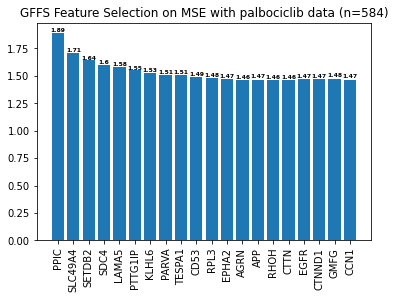

In [30]:
# plot with error bars

import matplotlib.pyplot as plt

gffs_feature_names = [feature_data.columns[i] for i in gffs_feature_selected]

# invert successive_scores
successive_scores = [-x for x in successive_scores]

plt.bar(gffs_feature_names, successive_scores)
plt.title('GFFS Feature Selection on MSE with palbociclib data (n=584)')
plt.xticks(rotation=90)

# show each bar value

for i, v in enumerate(successive_scores):
    # change v to 2 decimal places
    v = round(v, 2)
    plt.text(i, v, str(v), color='black', fontweight='bold', fontsize=6, ha='center', va='bottom', rotation=0)

plt.show()

In [31]:
mrmr_feature_selected20, successive_scores = mrmr_select_fcq(feature_data, label_data, 20, verbose=1)

Iteration 1 selected PPIC score 22121132.165451527 remaining 19220 features
Iteration 2 selected CELA2A score 83980.20393559842 remaining 19219 features
Iteration 3 selected NWD1 score 4595.222986770851 remaining 19218 features
Iteration 4 selected GLI1 score 1195.3388663691114 remaining 19217 features
Iteration 5 selected SLC49A4 score 1023.787911536718 remaining 19216 features
Iteration 6 selected RPL3 score 700.2496622792282 remaining 19215 features
Iteration 7 selected AMOTL2 score 620.9156116941508 remaining 19214 features
Iteration 8 selected LAMA5 score 537.1574529477324 remaining 19213 features
Iteration 9 selected CARNMT1 score 505.52523237115287 remaining 19212 features
Iteration 10 selected SDC4 score 537.4862732811785 remaining 19211 features
Iteration 11 selected TUFT1 score 498.06030969716284 remaining 19210 features
Iteration 12 selected WAS score 473.376975851769 remaining 19209 features
Iteration 13 selected PXDC1 score 446.2845514086713 remaining 19208 features
Iterat

In [32]:
# test on 20 features with naive test

mrmr_feature_selected20_data = feature_data.iloc[:, mrmr_feature_selected20]

naive_test_regression(mrmr_feature_selected20_data, label_data)

------ Naive test - linear regression
linear regression, score: 1.4461633652373238, std: 0.14293487268732272
------ Naive test - linear SVR
linear SVR, score: 1.5176088621429449, std: 0.10135446338172095


In [33]:
gffs_feature_selected_data = feature_data.iloc[:, gffs_feature_selected]

naive_test_regression(gffs_feature_selected_data, label_data)

------ Naive test - linear regression
linear regression, score: 1.494157425185024, std: 0.1917886010982544
------ Naive test - linear SVR
linear SVR, score: 1.5714571107857744, std: 0.27412238430052754


### Test 2